Bar graphs are perhaps the most commonly used kind of data visualization.
They’re typically used to display numeric values (on the y-axis), for different
categories (on the x-axis).

## Making a Basic Bar Graph
You have a data frame where one column represents the x position of each
bar, and another column represents the vertical (y) height of each bar.

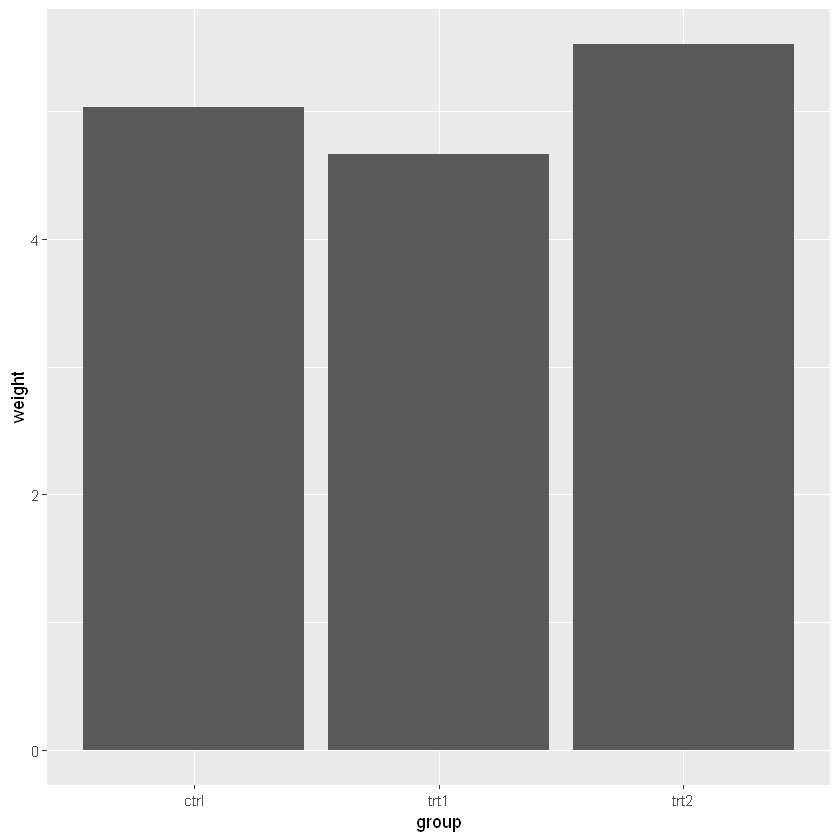

In [2]:
library(gcookbook) # Load gcookbook for the pg_mean data set
library(ggplot2)
ggplot(pg_mean,aes(x=group,y=weight)) + 
geom_col()

When x is a continuous (or numeric) variable, the bars behave a little
differently. Instead of having one bar at each actual x value, there is one bar at
each possible x value between the minimum and the maximum.

**You can convert the continuous variable to a discrete variable by
using factor()**

In [4]:
str(BOD)

'data.frame':	6 obs. of  2 variables:
 $ Time  : num  1 2 3 4 5 7
 $ demand: num  8.3 10.3 19 16 15.6 19.8
 - attr(*, "reference")= chr "A1.4, p. 270"


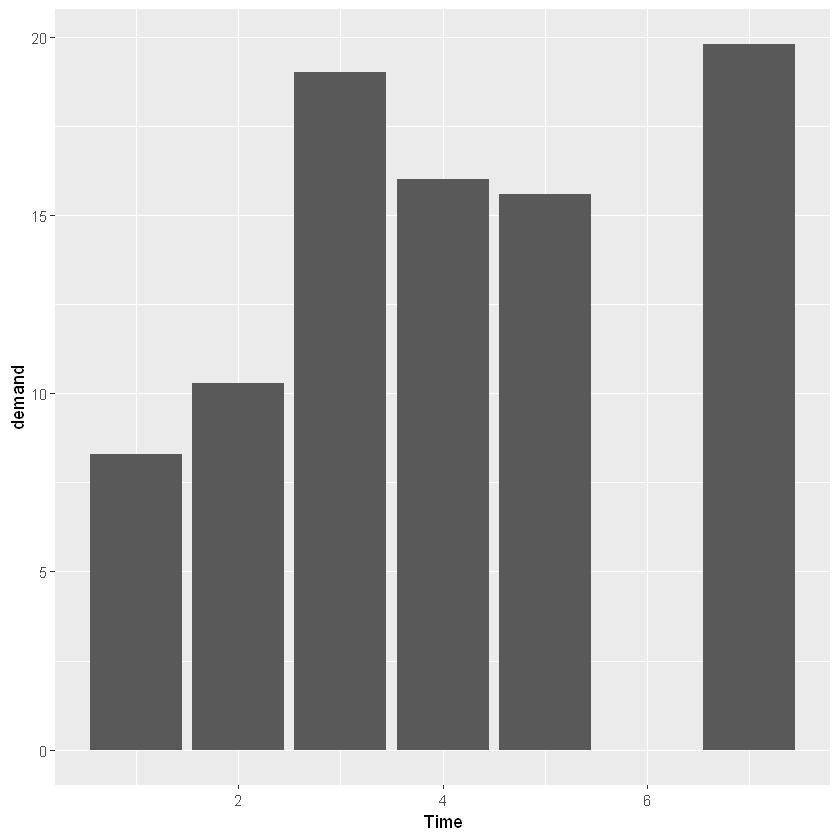

In [5]:
ggplot(BOD, aes(x = Time, y = demand)) +
geom_col()

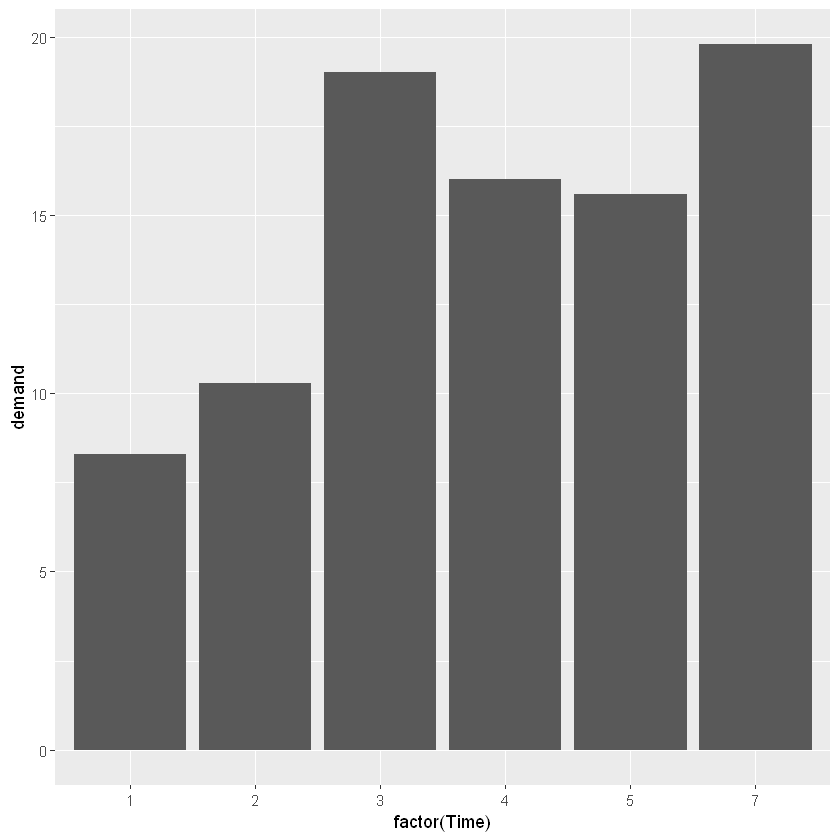

In [6]:
ggplot(BOD, aes(x = factor(Time), y = demand)) +
geom_col()

Notice that there was no row in BOD for Time = 6. When the x variable is
continuous, ggplot2 will use a numeric axis that will have space for all
numeric values within the range—hence the empty space for 6 in the plot.
When Time is converted to a factor, ggplot2 uses it as a discrete variable,
where the values are treated as arbitrary labels instead of numeric values, and
so it won’t allocate space on the x-axis for all possible numeric values
between the minimum and maximum.

By default, bar graphs use a dark grey for the bars. To use a color fill, use fill.

Also, by default, there is no outline around the fill. To add an outline,
use colour.

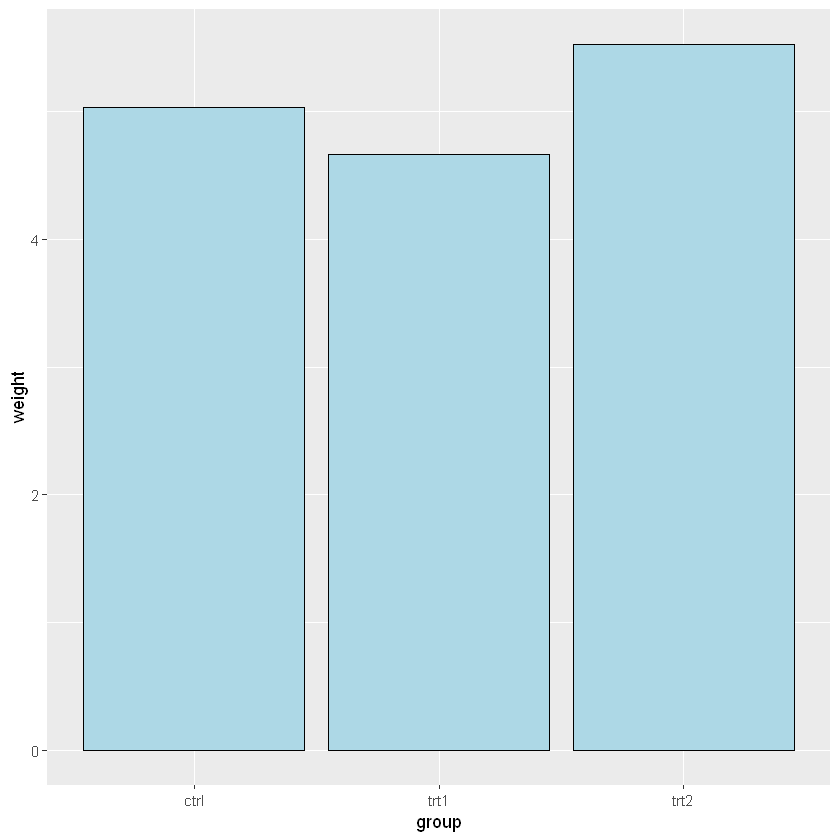

In [10]:
ggplot(pg_mean, aes(x=group, y=weight))+
geom_col(fill='lightblue',color='black')

## Group Bars Together
You want to group bars together by a second variable.

In [11]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


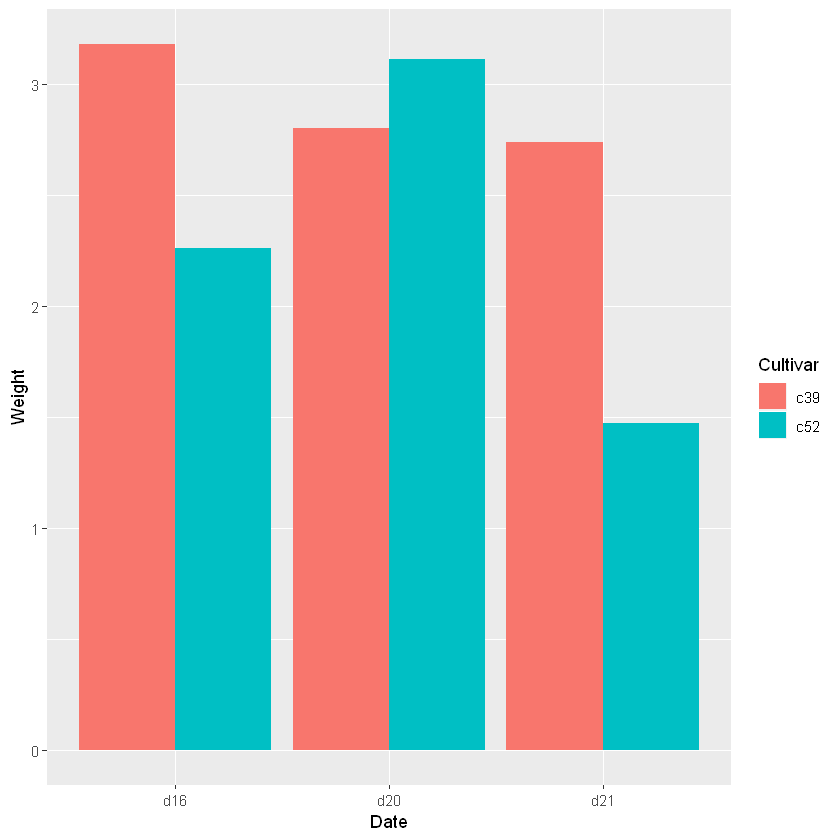

In [12]:
ggplot(cabbage_exp, aes(x= Date, y=Weight, fill = Cultivar)) + 
geom_col(position = "dodge")

The most basic bar graphs have one categorical variable on the x-axis and one
continuous variable on the y-axis. Sometimes you’ll want to use another
categorical variable to divide up the data, in addition to the variable on the xaxis. You can produce a grouped bar plot by mapping that variable to fill,
which represents the fill color of the bars. You must also use position =
"dodge", which tells the bars to “dodge” each other horizontally; if you don’t,
you’ll end up with a stacked bar plot.

As with variables mapped to the x-axis of a bar graph, variables that are
mapped to the fill color of bars must be categorical rather than continuous
variables.

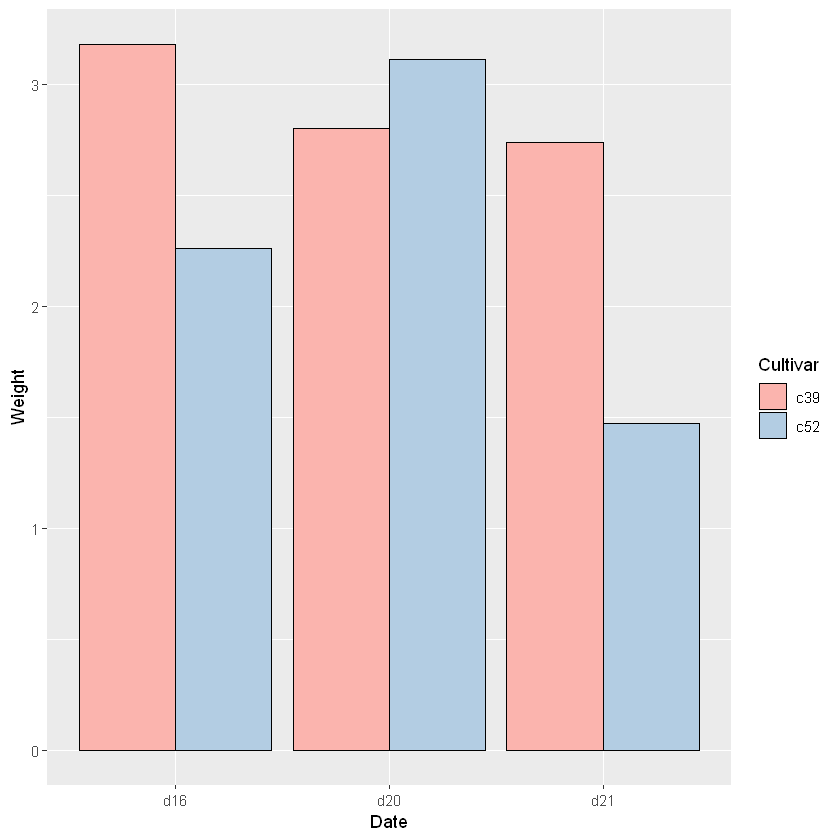

In [13]:
ggplot(cabbage_exp, aes(x=Date,y=Weight,fill=Cultivar)) +
geom_col(position = "dodge", color = "black") +
scale_fill_brewer(palette = 'Pastel1')

Note that if there are any missing combinations of the categorical variables,
that bar will be missing, and the neighboring bars will expand to fill that
space. If we remove the last row from our example data frame, we get

In [15]:
ce <- cabbage_exp[1:5,]
ce

Cultivar,Date,Weight,sd,n,se
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887


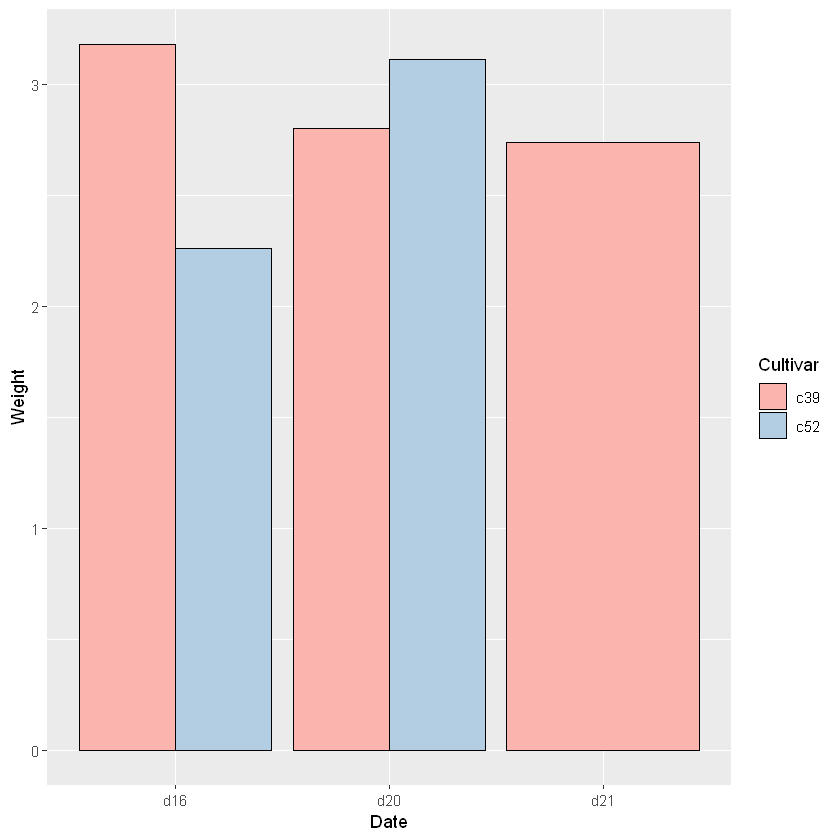

In [16]:
ggplot(ce, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(position = "dodge", colour = "black") +
scale_fill_brewer(palette = "Pastel1")

If your data has this issue, you can manually make an entry for the missing
factor level combination with an NA for the y variable.

## Making a Bar Graph of Counts
Your data has one row representing each case, and you want plot counts of the cases.

Use geom_bar() without mapping anything to y

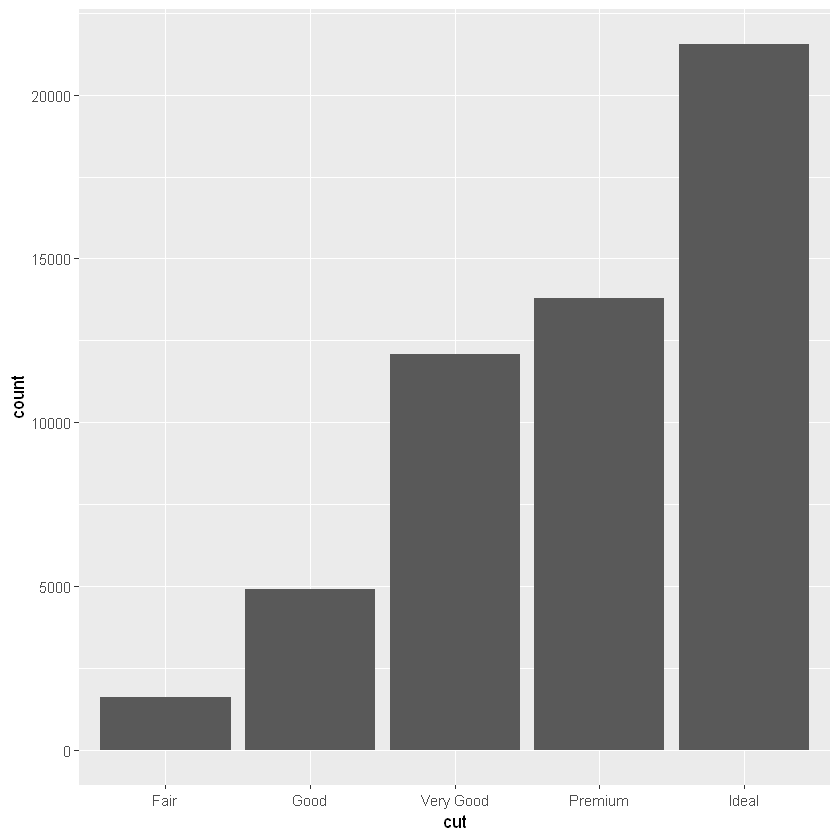

In [17]:
ggplot(diamonds, aes(x=cut)) + 
geom_bar()

In [18]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


## Using Colors in a Bar Graph
Use geom_bar() without mapping anything to y.

Map the appropriate variable to the fill aesthetic.

In [20]:
library(dplyr)
upc <- uspopchange %>%
    arrange(desc(Change)) %>%
    slice(1:10)
upc

State,Abb,Region,Change
Nevada,NV,West,35.1
Arizona,AZ,West,24.6
Utah,UT,West,23.8
Idaho,ID,West,21.1
Texas,TX,South,20.6
North Carolina,NC,South,18.5
Georgia,GA,South,18.3
Florida,FL,South,17.6
Colorado,CO,West,16.9
South Carolina,SC,South,15.3


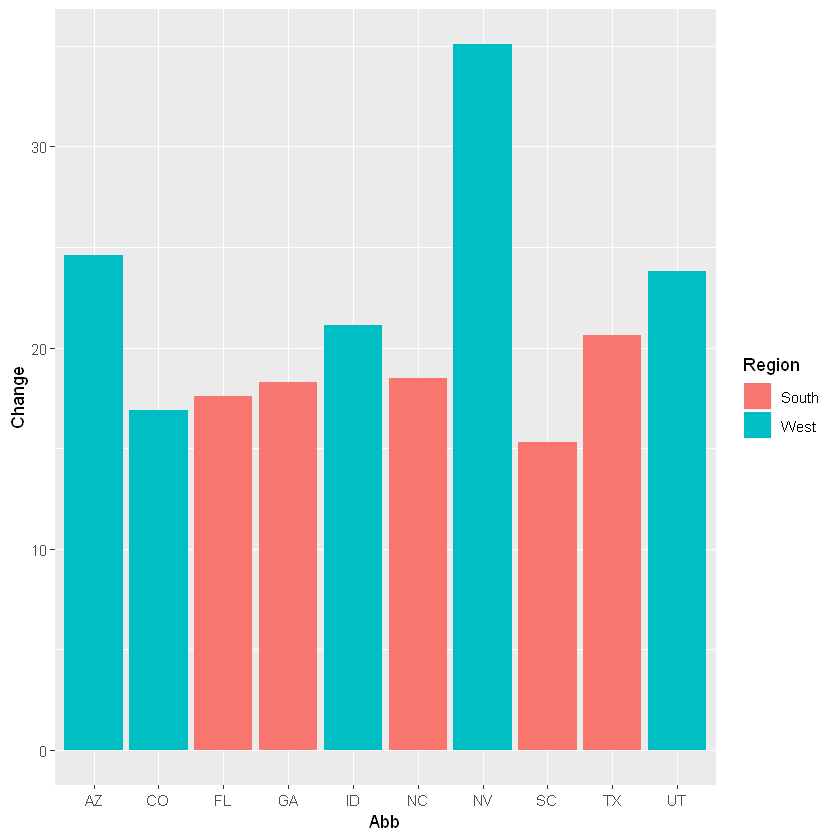

In [21]:
ggplot(upc, aes(x=Abb,y=Change,fill=Region))+
geom_col()

The default colors aren’t the most appealing, so you may want to set them
using scale_fill_brewer() or scale_fill_manual().

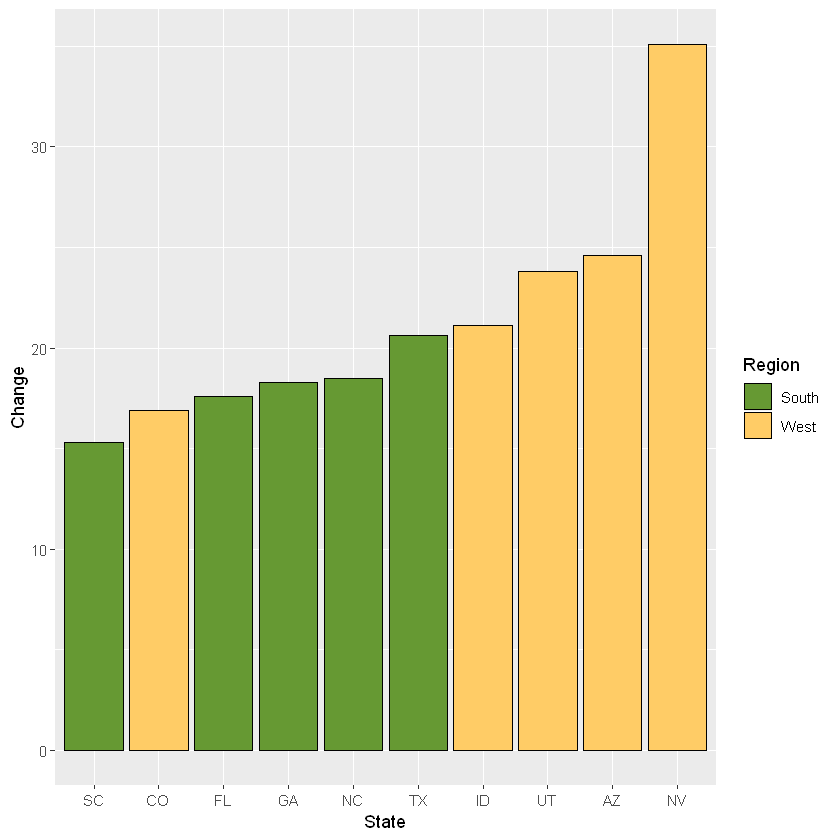

In [22]:
ggplot(upc, aes(x = reorder(Abb, Change), y = Change, fill = Region)) +
geom_col(colour = "black") +
scale_fill_manual(values = c("#669933", "#FFCC66")) +
xlab("State")

## Coloring Negative and Positive Bars Differently
You want to use different colors for negative and positive-valued bars.

In [23]:
climate_sub <- climate %>%
    filter(Source == 'Berkeley' & Year >= 1900) %>%
    mutate(pos = Anomaly10y >= 0)
climate_sub

Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y,pos
Berkeley,1900,NA,NA,-0.171,0.108,FALSE
Berkeley,1901,NA,NA,-0.162,0.109,FALSE
Berkeley,1902,NA,NA,-0.177,0.108,FALSE
Berkeley,1903,NA,NA,-0.199,0.104,FALSE
Berkeley,1904,NA,NA,-0.223,0.105,FALSE
Berkeley,1905,NA,NA,-0.241,0.107,FALSE
Berkeley,1906,NA,NA,-0.294,0.106,FALSE
Berkeley,1907,NA,NA,-0.312,0.105,FALSE
Berkeley,1908,NA,NA,-0.328,0.103,FALSE
Berkeley,1909,NA,NA,-0.281,0.101,FALSE


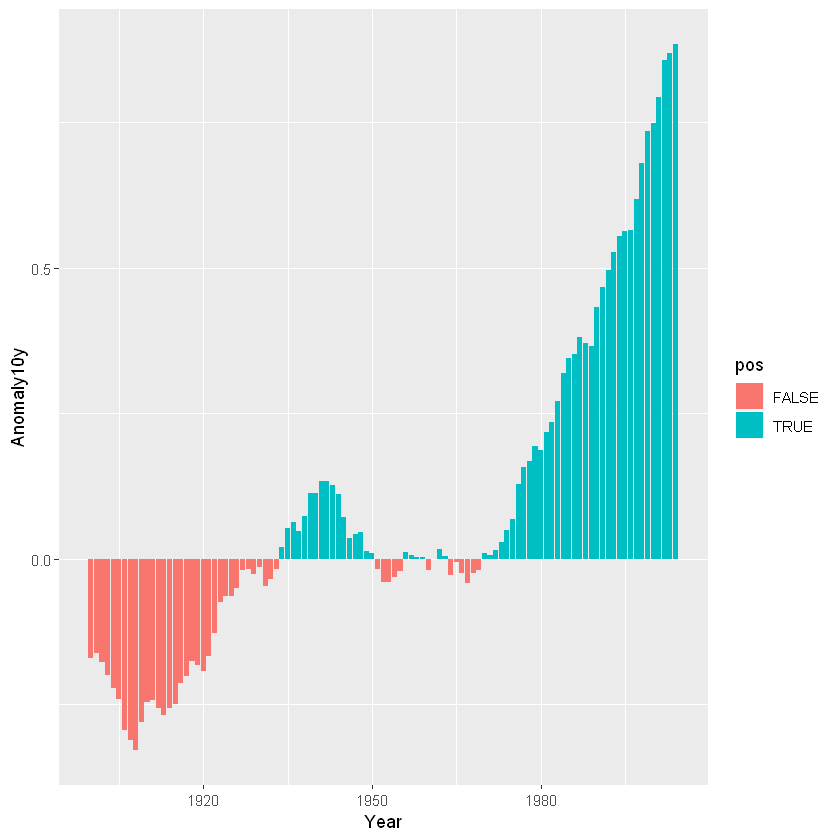

In [25]:
ggplot(climate_sub, aes(x= Year,y=Anomaly10y,fill=pos))+
geom_col(position = 'identity')

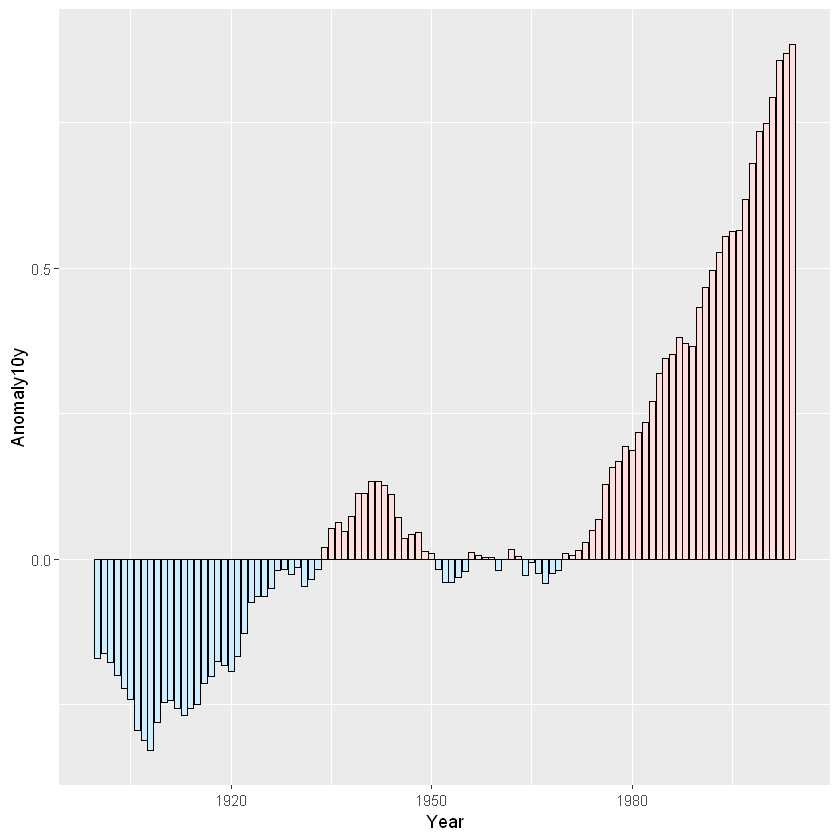

In [26]:
ggplot(climate_sub, aes(x= Year,y=Anomaly10y,fill=pos))+
geom_col(position = "identity", colour = "black", size = 0.25) +
scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = FALSE)

## Agjusting Bar Width and Spacing
You want to adjust the width of bars and the spacing between them.

To make the bars narrower or wider, set width in geom_bar(). The default
value is 0.9; larger values make the bars wider, and smaller values make the
bars narrower.

For standard-width bars

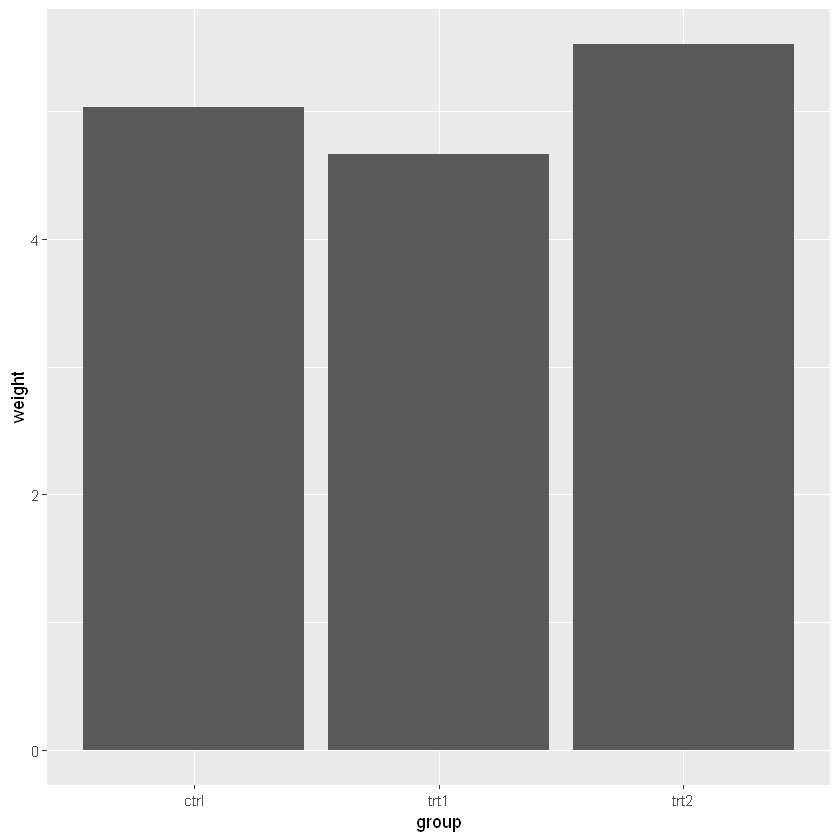

In [28]:
ggplot(pg_mean, aes(x = group, y = weight)) +
geom_col()

For narrower bars

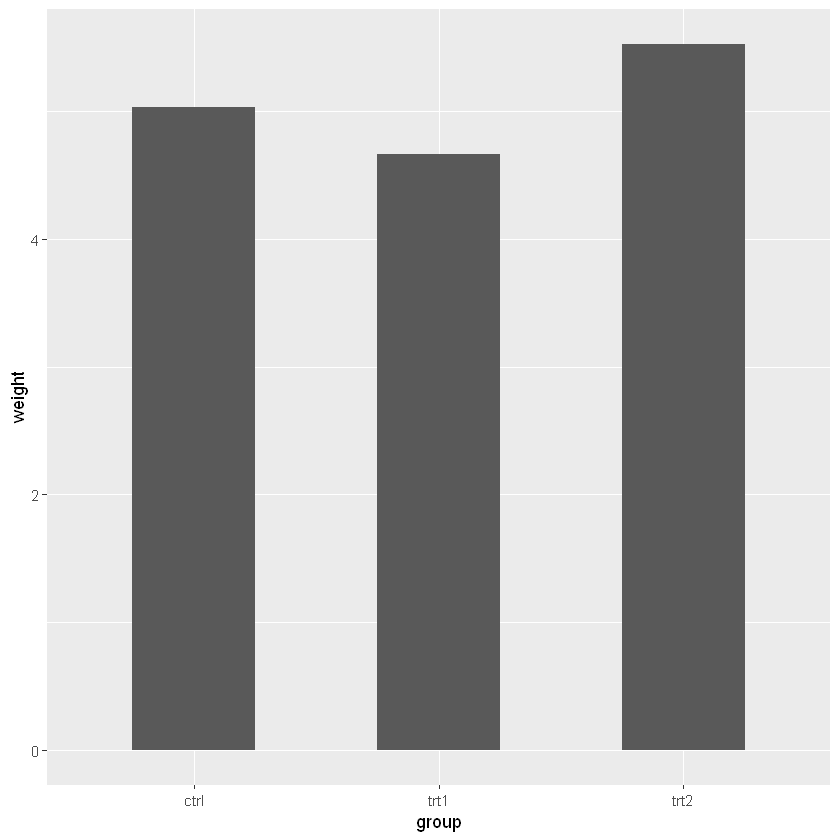

In [29]:
ggplot(pg_mean, aes(x = group, y = weight)) +
geom_col(width = 0.5)

For wider bars

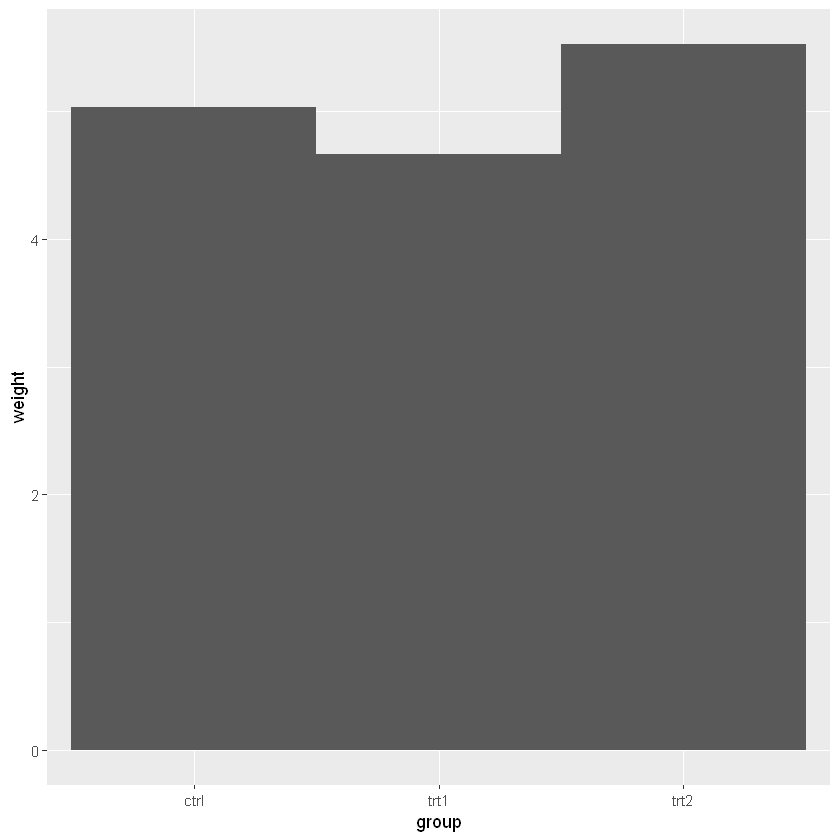

In [30]:
ggplot(pg_mean, aes(x = group, y = weight)) +
geom_col(width = 1)

For grouped bars, the default is to have no space between bars within each
group. To add space between bars within a group, make the width smaller and
set the value for position_dodge to be larger than width

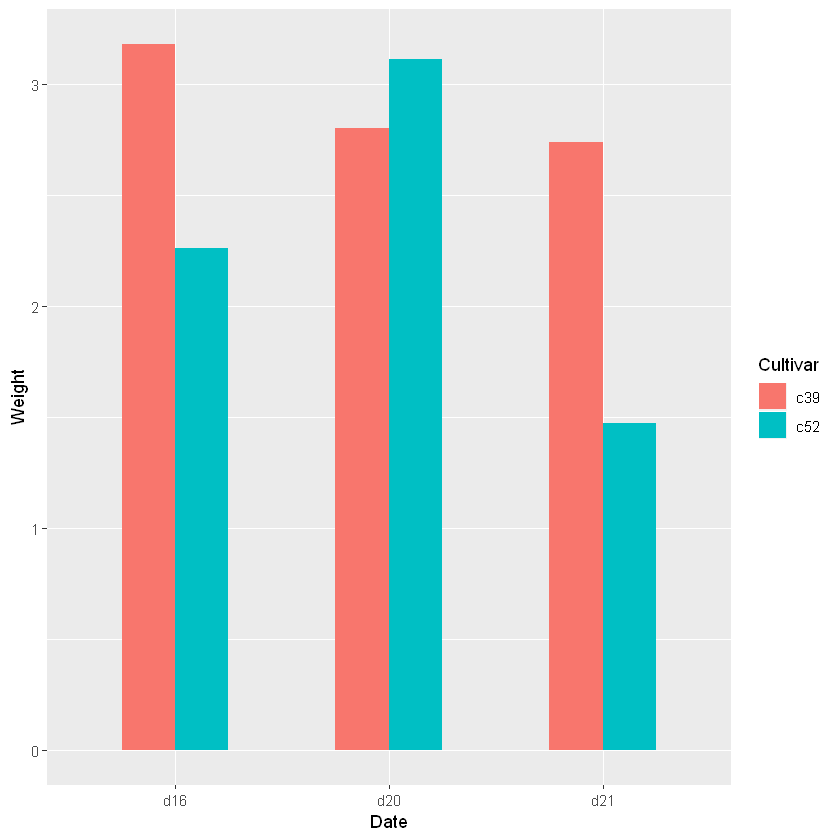

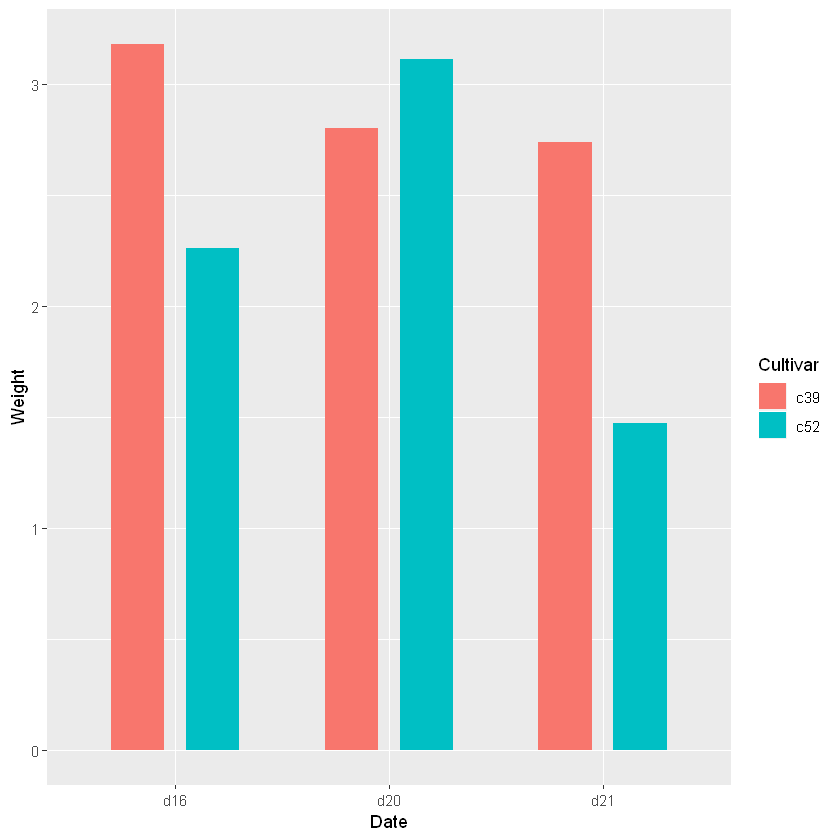

In [31]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(width = 0.5, position = "dodge")
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(width = 0.5, position = position_dodge(0.7))

All of these will have the same result:
```
geom_bar(position = "dodge")
geom_bar(width = 0.9, position = position_dodge())
geom_bar(position = position_dodge(0.9))
geom_bar(width = 0.9, position = position_dodge(width=0.9))
```

## Making a Stacked Bar Graph
Use geom_bar() and map a variable to fill. This will put Date on the x-axis
and use Cultivar for the fill color.

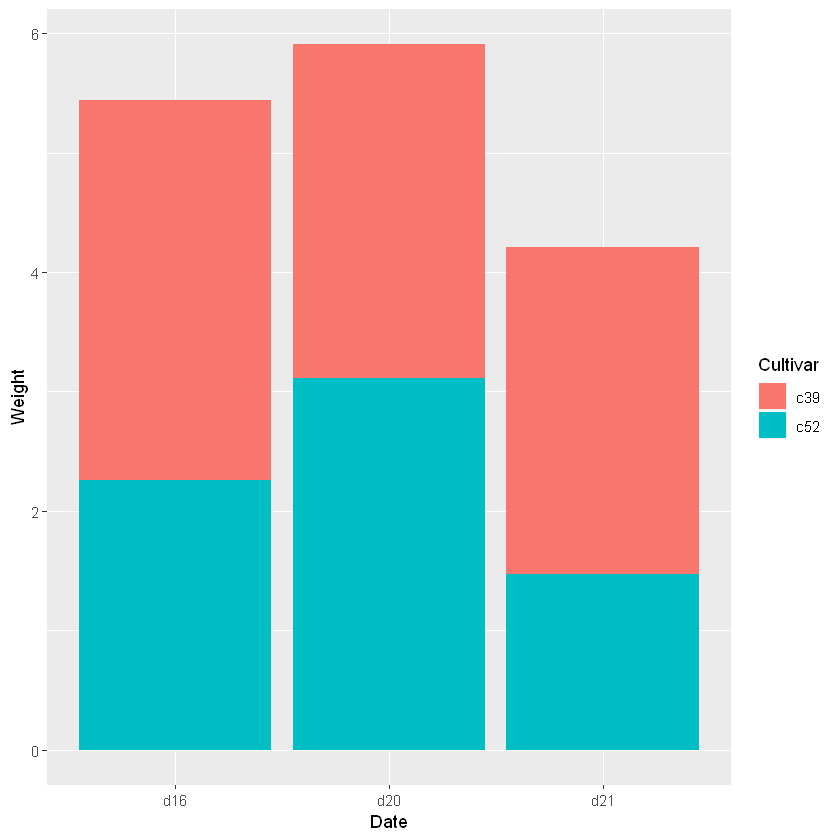

In [33]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col()

By default, the stacking order of the bars is the same as the order of items in
the legend. For some data sets it might make sense to reverse the order of the
legend. To do this, you can use the guides function and specify the aesthetic
for which the legend should be reversed. In this case, it’s fill

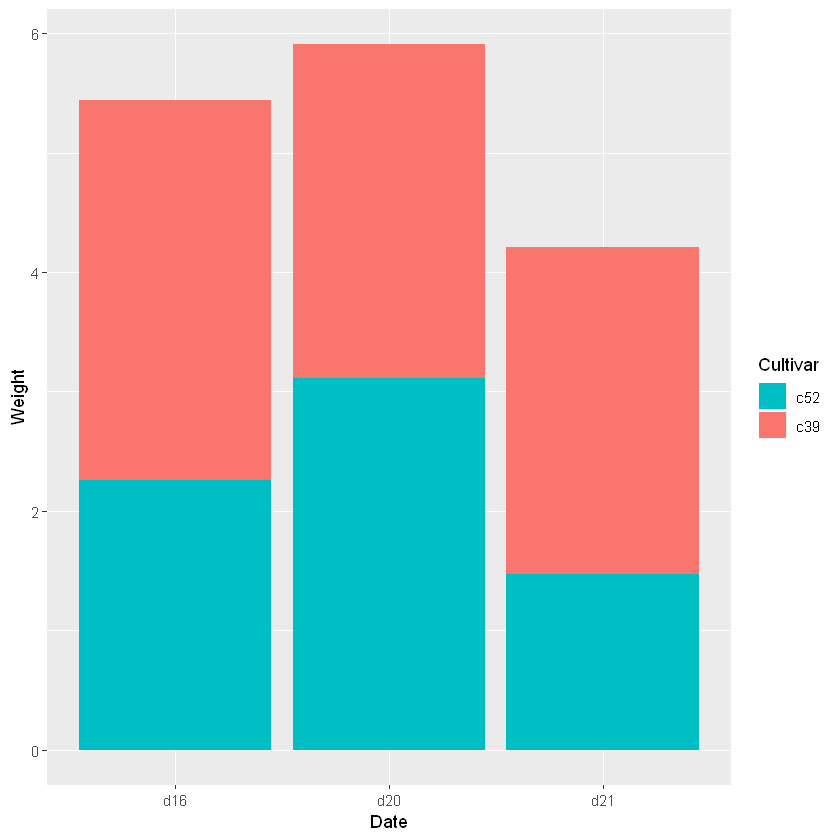

In [34]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col() +
guides(fill = guide_legend(reverse = TRUE))

You’ll also need to reverse the order of
the legend for it to match the order of the bars:

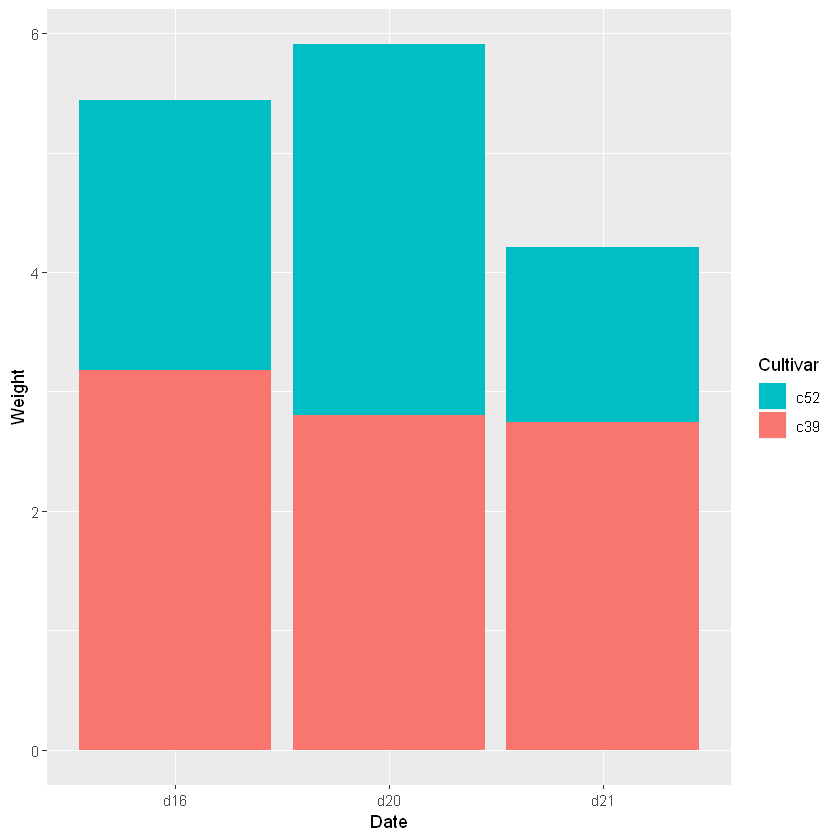

In [35]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(position = position_stack(reverse = TRUE)) +
guides(fill = guide_legend(reverse = TRUE))

It’s also possible to modify the column of the data frame so that the factor
levels are in a different order.

For a more polished graph, we’ll use scale_fill_brewer() to get a different
color palette, and use colour = "black" to get a black outline.

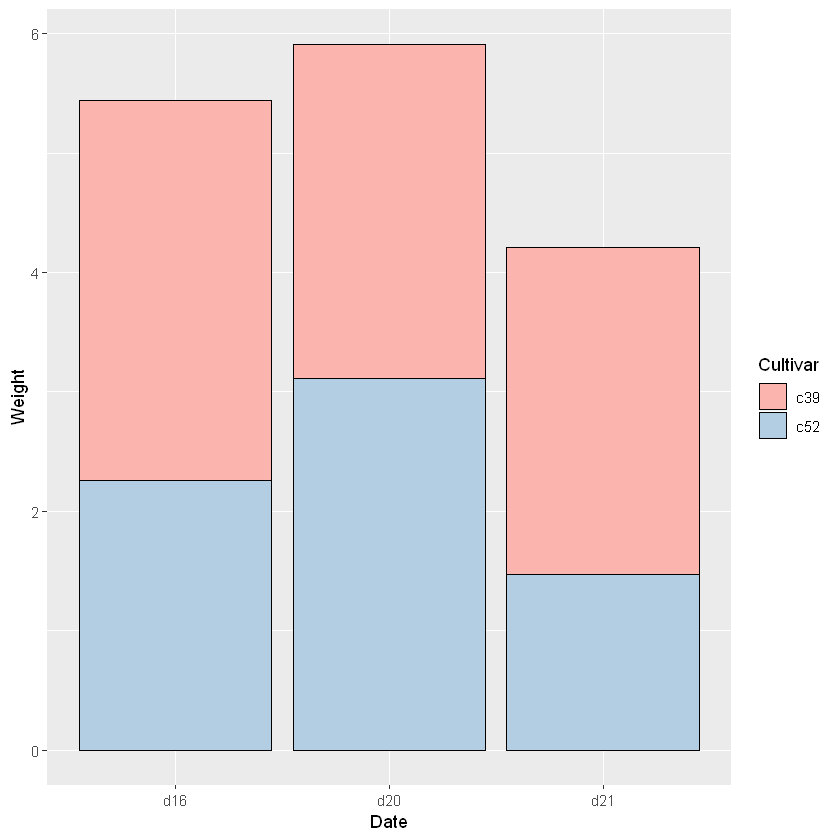

In [36]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(colour = "black") +
scale_fill_brewer(palette = "Pastel1")

## Making a Proportional Stacked Bar Graph

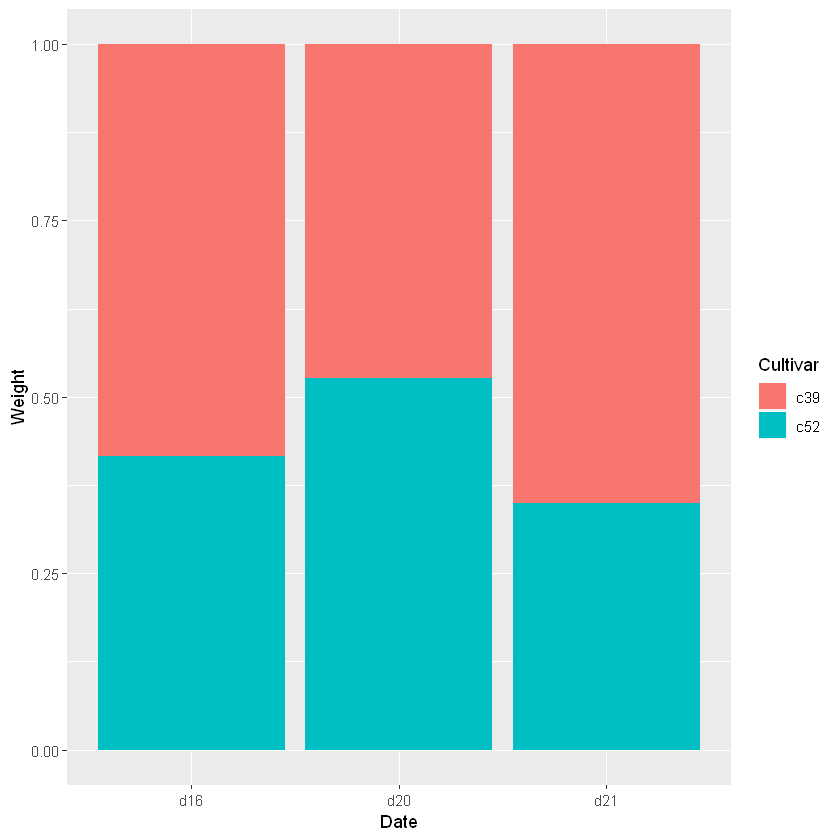

In [37]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(position = "fill")

With position = "fill", the y values will be scaled to go from 0 to 1. To
print the labels as percentages, use scale_y_continuous(labels =
scales::percent):

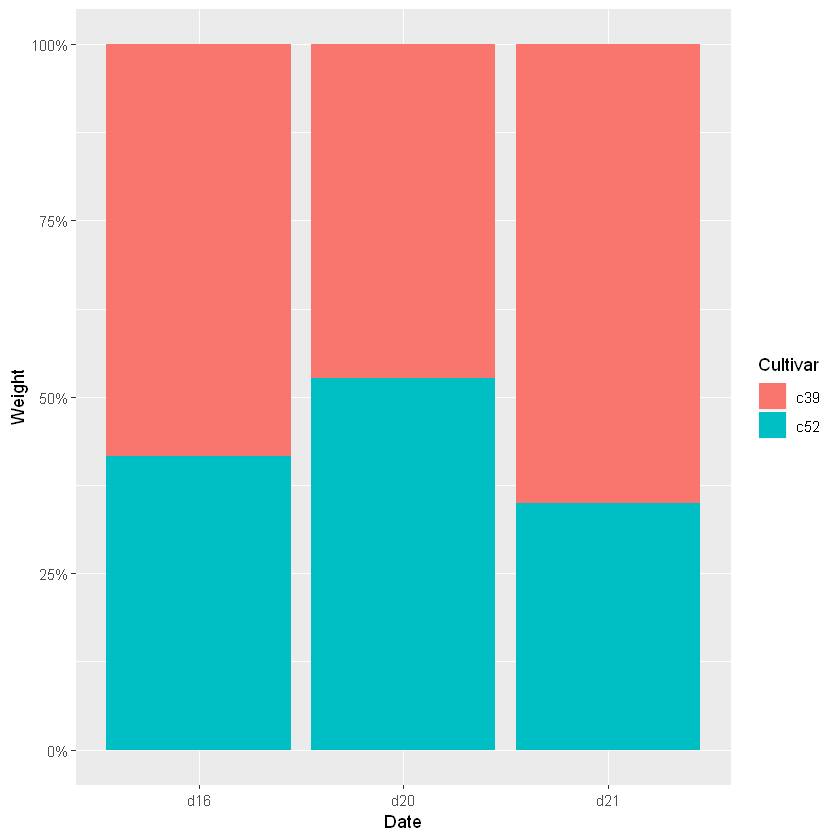

In [38]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(position = "fill") +
scale_y_continuous(labels = scales::percent)

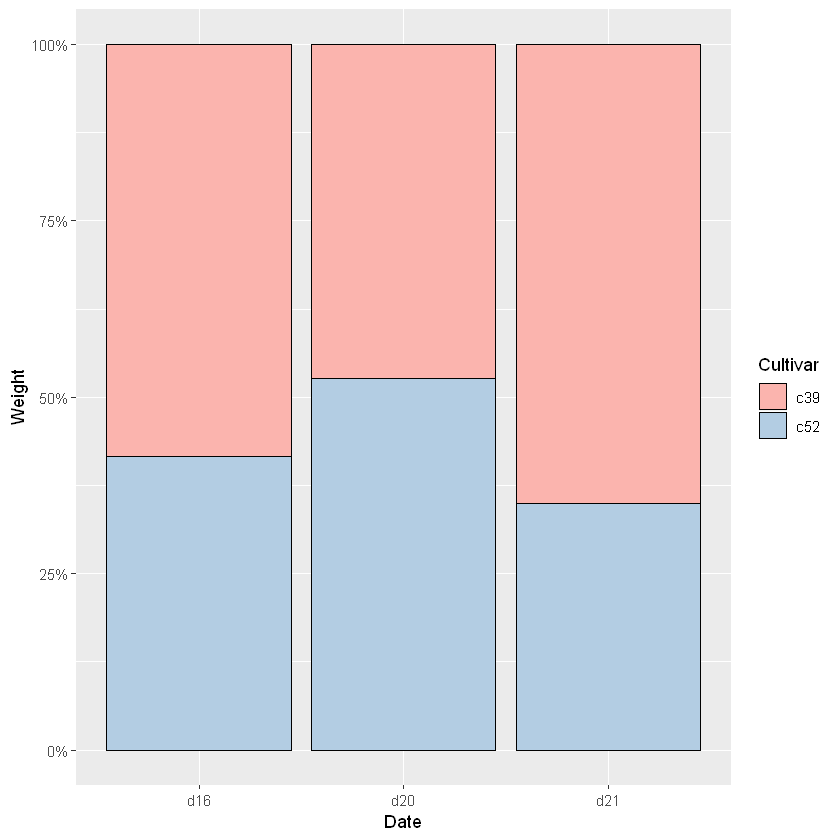

In [39]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(colour = "black", position = "fill") +
scale_y_continuous(labels = scales::percent) +
scale_fill_brewer(palette = "Pastel1")

## Adding Labels to a Bar Graph
Add geom_text() to your graph. It requires a mapping for x, y, and the text
itself. By setting vjust (the vertical justification), it is possible to move the
text above or below the tops of the bars.

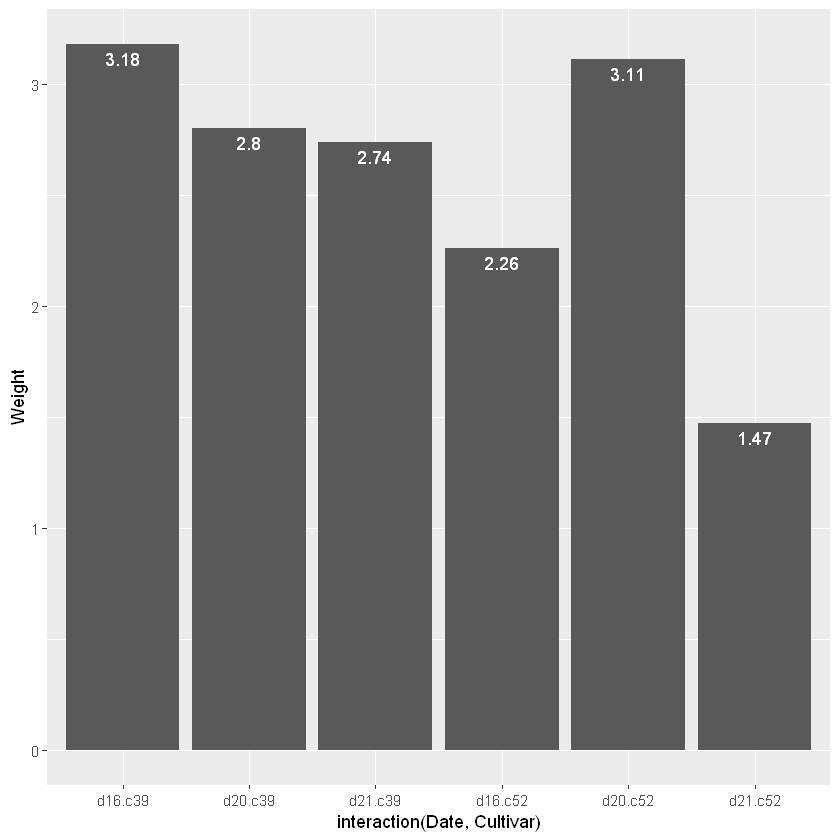

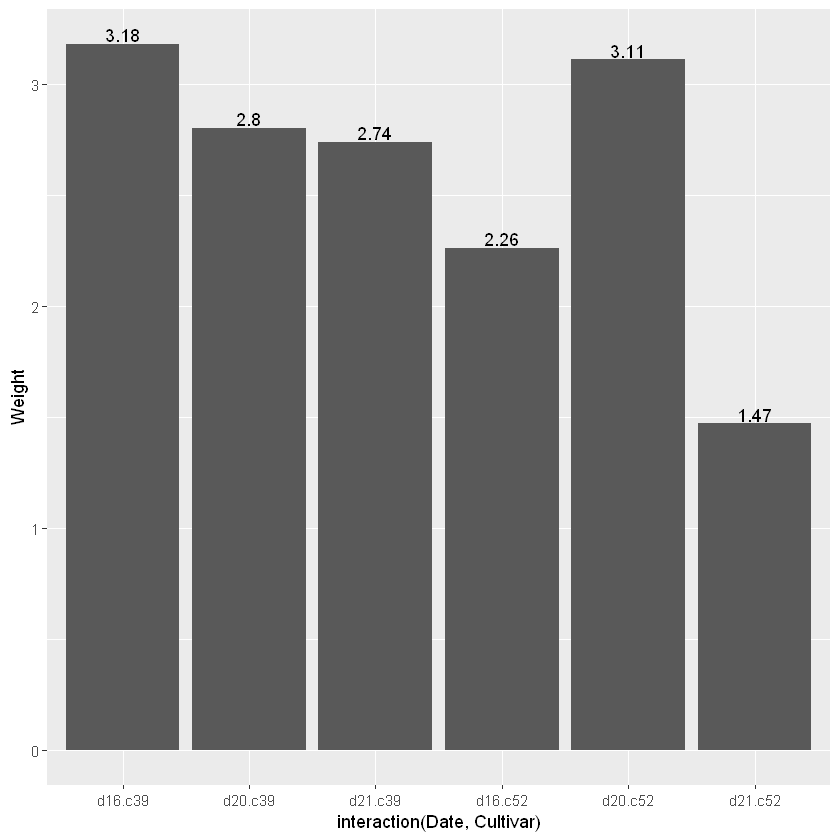

In [40]:
# Below the top
ggplot(cabbage_exp, aes(x = interaction(Date, Cultivar), y = Weight)) +
geom_col() +
geom_text(aes(label=Weight),vjust = 1.5, color = 'white')
# Above the top
ggplot(cabbage_exp, aes(x = interaction(Date, Cultivar), y = Weight)) +
geom_col() +
geom_text(aes(label = Weight), vjust = -0.2)

Another common scenario is to add labels for a bar graph of counts instead of
values.

To do this, use geom_bar(), which adds bars whose height is
proportional to the number of rows, and then use geom_text() with counts.

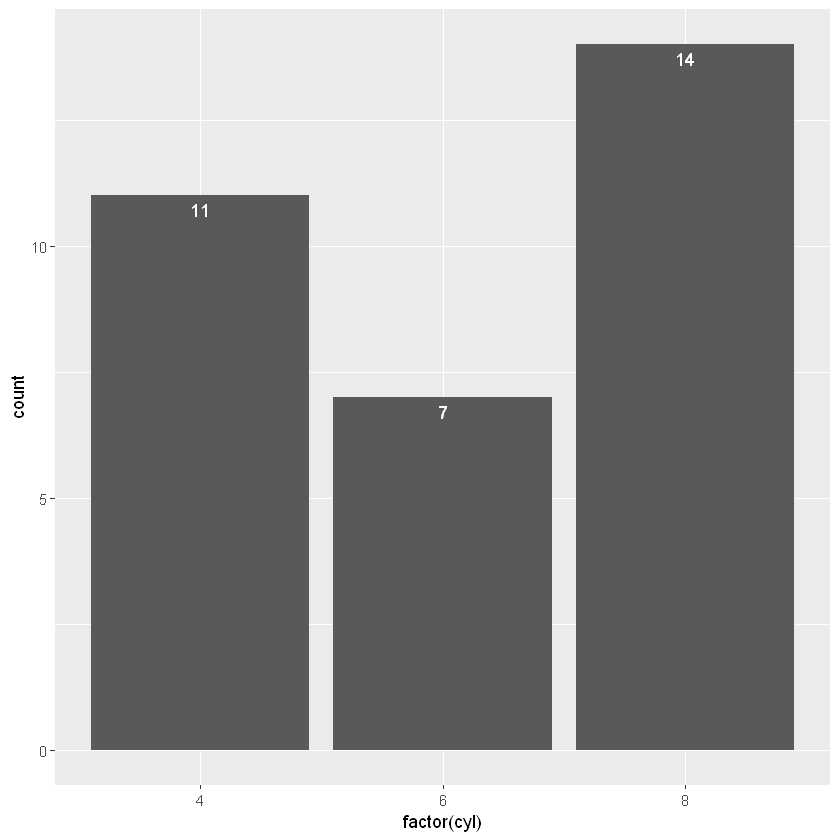

In [41]:
ggplot(mtcars, aes(x = factor(cyl))) +
geom_bar() +
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5,
colour = "white")

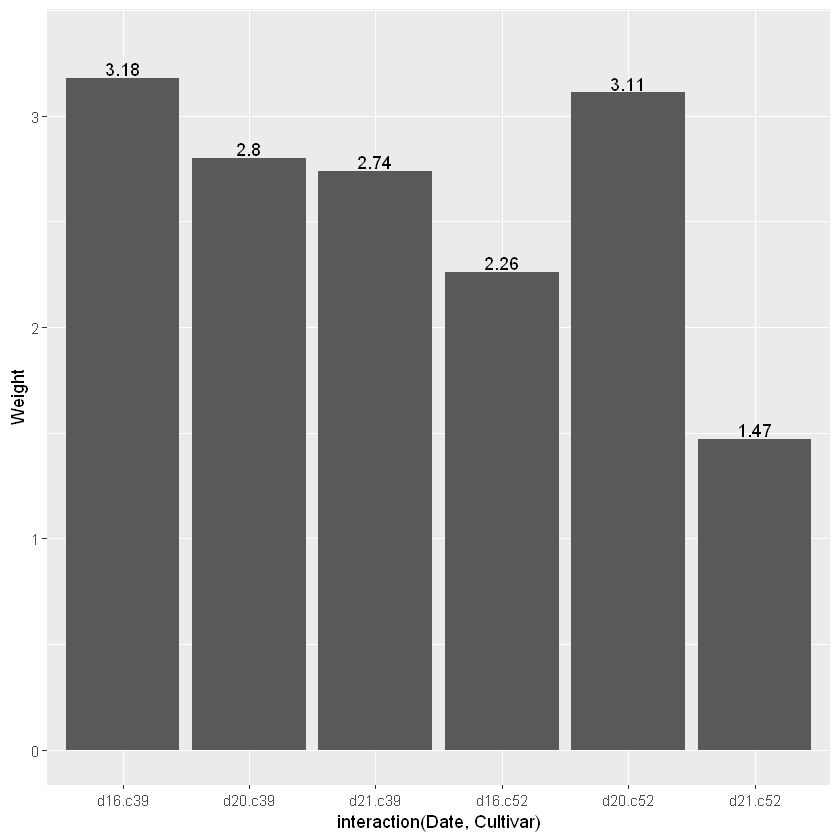

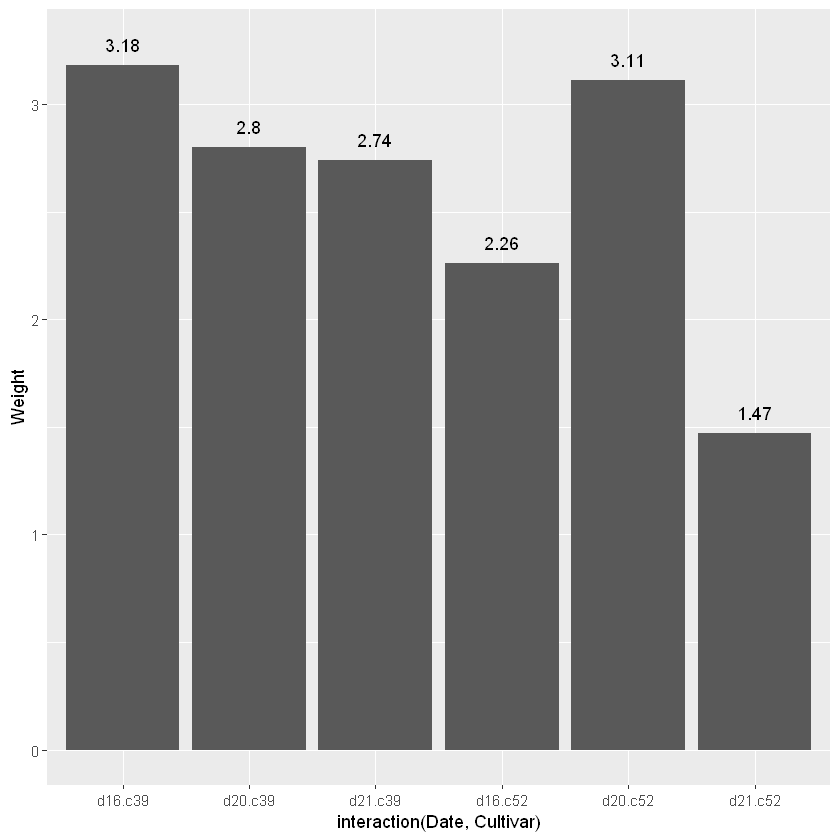

In [42]:
# Adjust y limits to be a little higher
ggplot(cabbage_exp, aes(x = interaction(Date, Cultivar), y = Weight)) +
geom_col() +
geom_text(aes(label = Weight), vjust = -0.2) +
ylim(0, max(cabbage_exp$Weight) * 1.05)
# Map y positions slightly above bar top - y range of plot will auto-adjust
ggplot(cabbage_exp, aes(x = interaction(Date, Cultivar), y = Weight)) +
geom_col() +
geom_text(aes(y = Weight + 0.1, label = Weight))

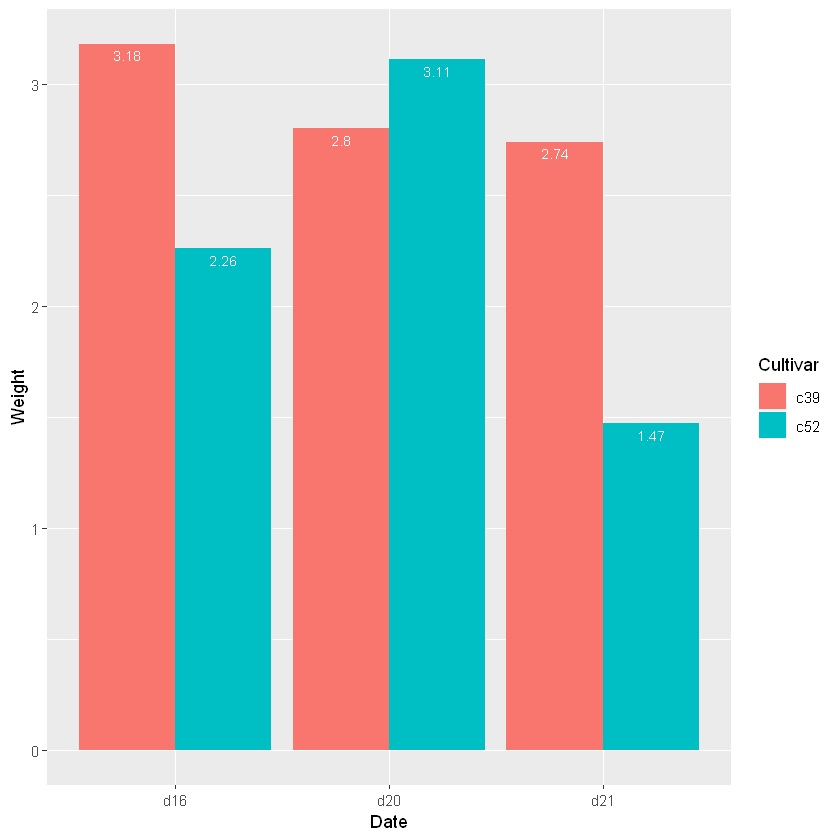

In [43]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(position = "dodge") +
geom_text(
aes(label = Weight),
colour = "white", size = 3,
vjust = 1.5, position = position_dodge(.9)
)

In [44]:
ce <- cabbage_exp %>%
arrange(Date, rev(Cultivar))
ce <- ce %>%
group_by(Date) %>%
mutate(label_y = cumsum(Weight))
ce

Cultivar,Date,Weight,sd,n,se,label_y
c52,d16,2.26,0.4452215,10,0.14079141,2.26
c39,d16,3.18,0.9566144,10,0.30250803,5.44
c52,d20,3.11,0.7908505,10,0.25008887,3.11
c39,d20,2.80,0.2788867,10,0.08819171,5.91
c52,d21,1.47,0.2110819,10,0.06674995,1.47
c39,d21,2.74,0.9834181,10,0.31098410,4.21


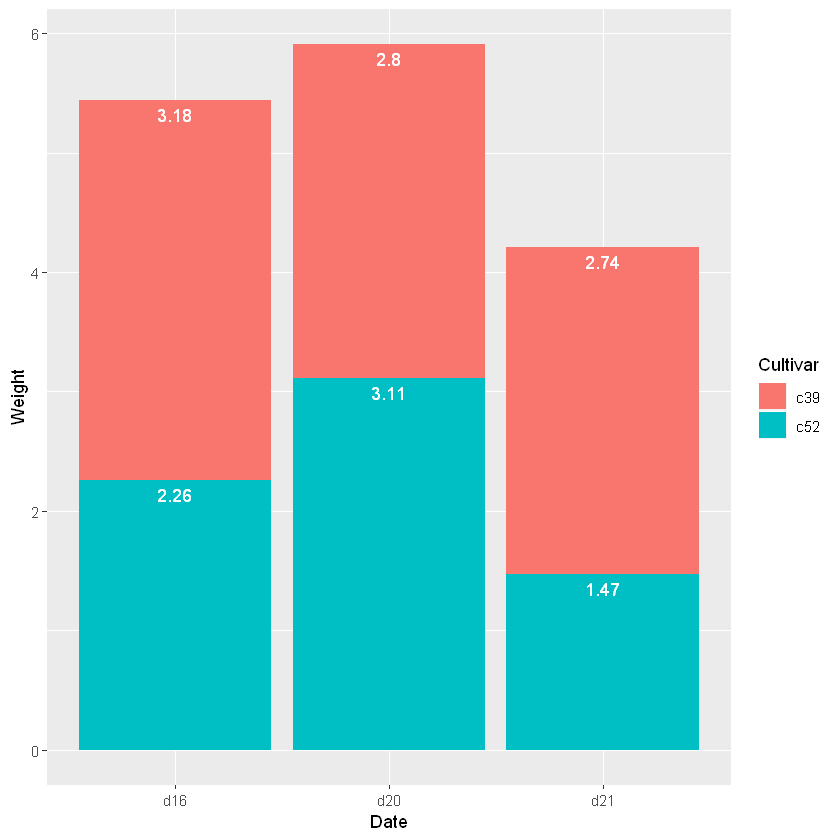

In [45]:
ggplot(ce, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col() +
geom_text(aes(y = label_y, label = Weight), vjust = 1.5, colour = "white")

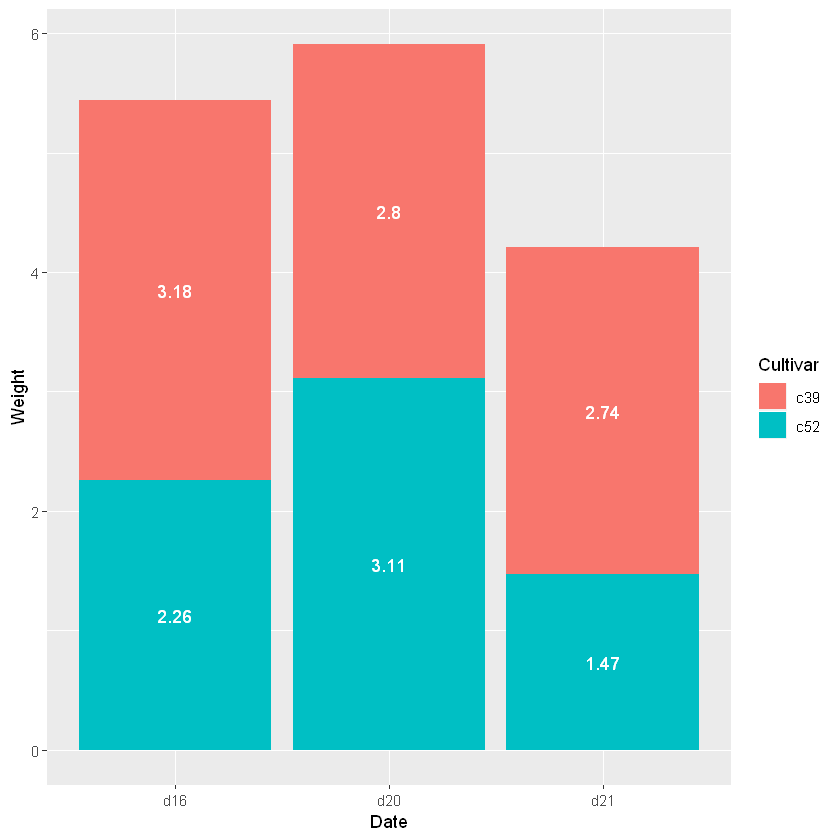

In [46]:
ce <- cabbage_exp %>%
arrange(Date, rev(Cultivar))
# Calculate y position, placing it in the middle
ce <- ce %>%
group_by(Date) %>%
mutate(label_y = cumsum(Weight) - 0.5 * Weight)
ggplot(ce, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col() +
geom_text(aes(y = label_y, label = Weight), colour = "white")

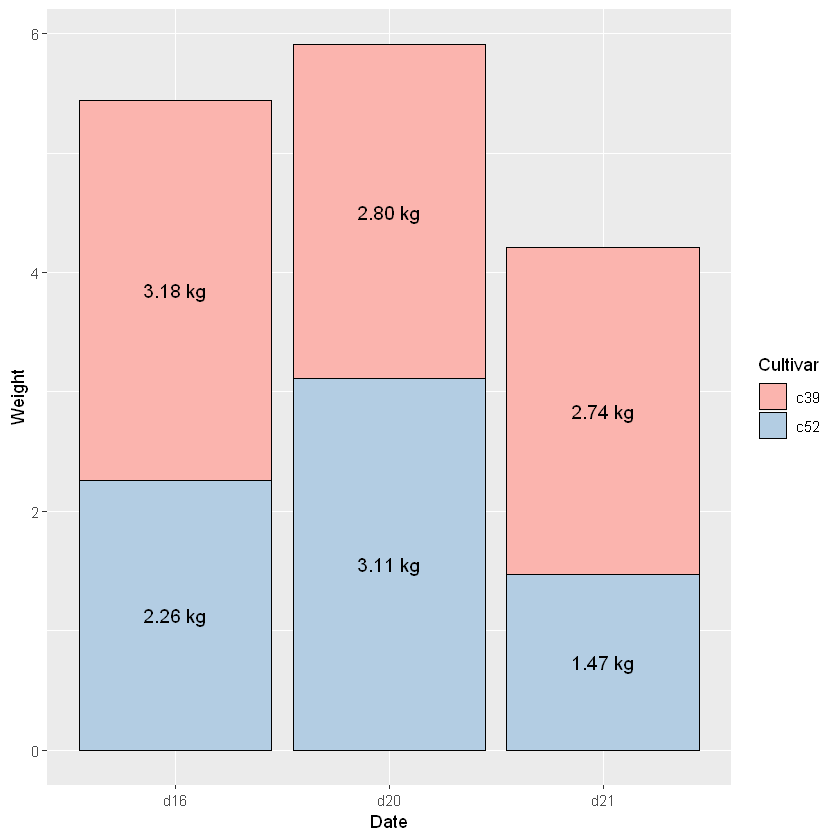

In [47]:
ggplot(ce, aes(x = Date, y = Weight, fill = Cultivar)) +
geom_col(colour = "black") +
geom_text(aes(y = label_y,
label = paste(format(Weight, nsmall = 2), "kg")),
size = 4) +
scale_fill_brewer(palette = "Pastel1")

## Making a Cleveland Dot Plot
Cleveland dot plots are an alternative to bar graphs that reduce visual clutter
and can be easier to read.

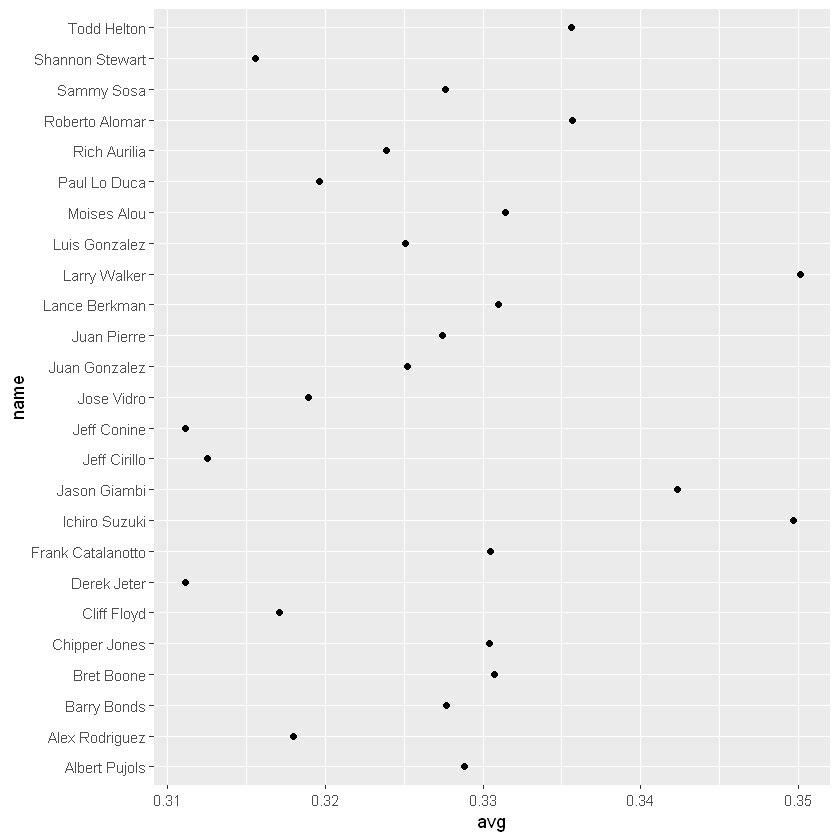

In [48]:
tophit <- tophitters2001[1:25, ]
ggplot(tophit, aes(x=avg,y=name))+
geom_point()

In [49]:
tophit[, c("name", "lg", "avg")]

name,lg,avg
Larry Walker,NL,0.3501
Ichiro Suzuki,AL,0.3497
Jason Giambi,AL,0.3423
Roberto Alomar,AL,0.3357
Todd Helton,NL,0.3356
Moises Alou,NL,0.3314
Lance Berkman,NL,0.3310
Bret Boone,AL,0.3307
Frank Catalanotto,AL,0.3305
Chipper Jones,NL,0.3304


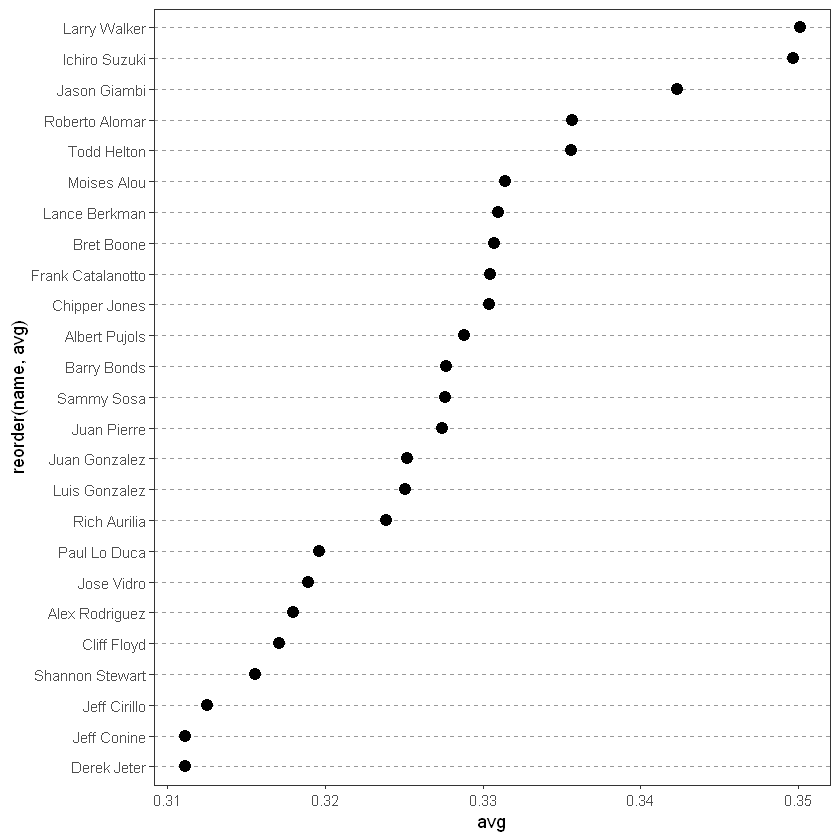

In [50]:
ggplot(tophit, aes(x = avg, y = reorder(name, avg))) +
geom_point(size = 3) + # Use a larger dot
theme_bw() +
theme(
panel.grid.major.x = element_blank(),
panel.grid.minor.x = element_blank(),
panel.grid.major.y = element_line(colour = "grey60", linetype = "dashed")
)

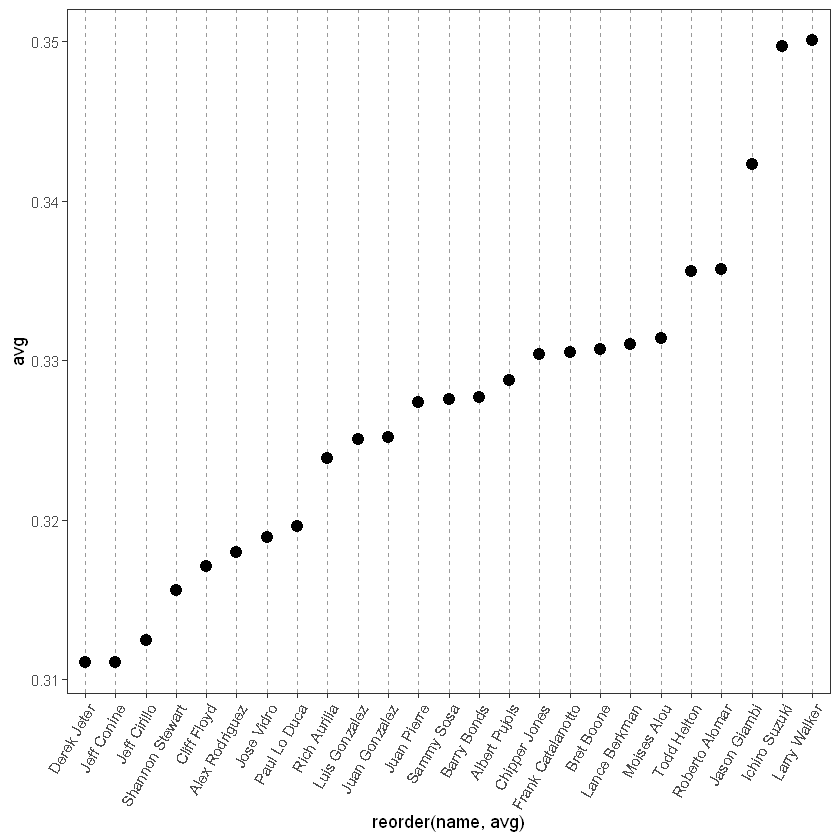

In [51]:
ggplot(tophit, aes(x = reorder(name, avg), y = avg)) +
geom_point(size = 3) + # Use a larger dot
theme_bw() +
theme(
panel.grid.major.y = element_blank(),
panel.grid.minor.y = element_blank(),
panel.grid.major.x = element_line(colour = "grey60", linetype = "dashed"),
axis.text.x = element_text(angle = 60, hjust = 1)
)

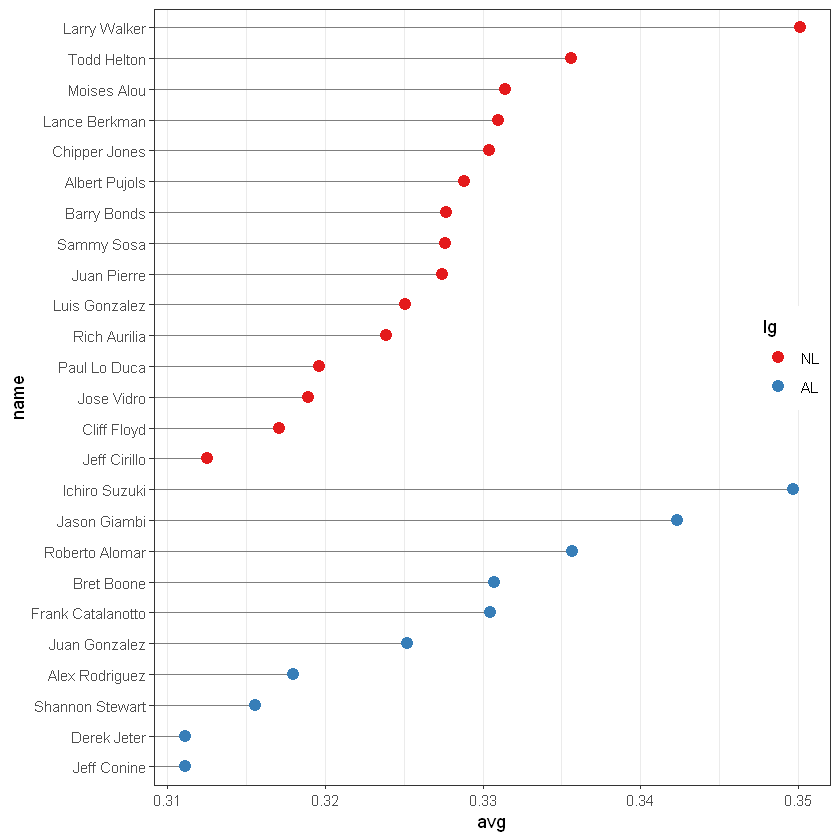

In [52]:
# Get the names, sorted first by lg, then by avg
nameorder <- tophit$name[order(tophit$lg, tophit$avg)]
# Turn name into a factor, with levels in the order of nameorder
tophit$name <- factor(tophit$name, levels = nameorder)
ggplot(tophit, aes(x = avg, y = name)) +
geom_segment(aes(yend = name), xend = 0, colour = "grey50") +
geom_point(size = 3, aes(colour = lg)) +
scale_colour_brewer(palette = "Set1", limits = c("NL", "AL")) +
theme_bw() +
theme(
panel.grid.major.y = element_blank(), # No horizontal grid lines
legend.position = c(1, 0.55), # Put legend inside plot area
legend.justification = c(1, 0.5)
)

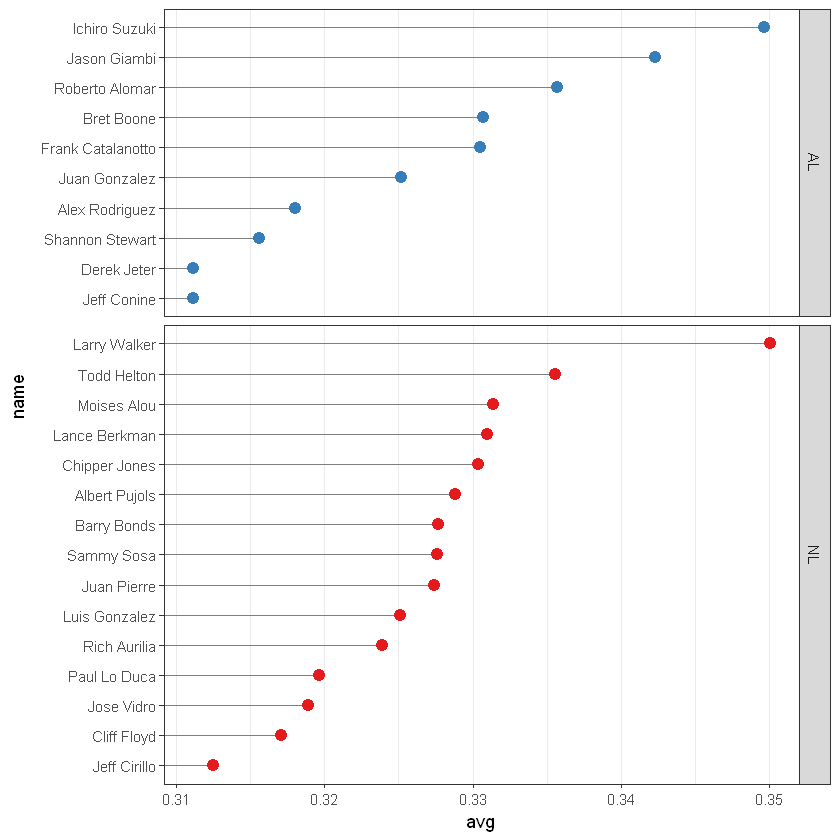

In [53]:
ggplot(tophit, aes(x = avg, y = name)) +
geom_segment(aes(yend = name), xend = 0, colour = "grey50") +
geom_point(size = 3, aes(colour = lg)) +
scale_colour_brewer(palette = "Set1", limits = c("NL", "AL"), guide = FALSE) +
theme_bw() +
theme(panel.grid.major.y = element_blank()) +
facet_grid(lg ~ ., scales = "free_y", space = "free_y")